In [1]:
import emoji
emoji.get_aliases_unicode_dict()

emoji_dict = {
    "0": ":red_heart:",
    "1": ":baseball:",
    "2": ":grinning_face_with_big_eyes:",
    "3": ":disappointed_face:",
    "4": ":fork_and_knife:",
    "5": ":hundred_points:",
    "6": ":fire:",
    "7": ":face_blowing_a_kiss:",
    "8": ":chestnut:",
    "9": ":flexed_biceps:", 
}

for i in emoji_dict.values():
    print(emoji.emojize(i))

❤️
⚾
😃
😞
🍴
💯
🔥
😘
🌰
💪


In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('dataset/train_emoji.csv', header=None)
test = pd.read_csv('dataset/test_emoji.csv', header=None)

pd.set_option('display.max_rows', None)
train.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [11]:
xtrain = train[0]
ytrain = train[1]

xtest = test[0]
ytest = test[1]

xtrain.shape, ytrain.shape

((132,), (132,))

In [4]:
for i in range(5):
    print(xtrain[i], emoji.emojize(emoji_dict[str(ytrain[i])]))

never talk to me again 😞
I am proud of your achievements 😃
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴


In [5]:
f = open('glove.6B.50d.txt', encoding='utf-8')

embeddings = {}
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float')
    embeddings[word] = coefs
f.close()

embeddings['hi'], embeddings['motor']

(array([-0.54313  ,  0.34427  ,  0.27125  ,  1.0487   , -1.1642   ,
        -1.2722   ,  0.35781  , -0.56527  , -0.29879  ,  0.85179  ,
         0.52222  , -0.0019718, -0.46435  ,  0.033631 ,  0.048367 ,
         0.78762  ,  0.075995 ,  0.51577  ,  0.34778  ,  0.53802  ,
         0.28299  , -0.1313   , -0.073753 ,  0.42614  ,  0.030954 ,
        -0.55033  , -0.99789  , -0.28947  ,  0.30517  , -1.1194   ,
         1.2957   ,  0.91165  ,  0.32222  ,  0.93405  , -0.34152  ,
        -0.62713  , -0.092165 ,  0.50901  ,  0.29204  , -0.20122  ,
         0.19614  , -0.45882  ,  1.1099   , -0.68737  ,  1.5724   ,
        -0.10446  ,  0.23594  , -0.56594  ,  0.43676  ,  0.98093  ]),
 array([ 0.060516, -0.03218 ,  0.82525 ,  1.0817  , -0.70655 ,  0.88125 ,
        -0.28674 , -0.22766 ,  0.31913 , -0.46552 ,  1.1369  , -0.34873 ,
        -0.79137 , -0.55369 , -0.397   , -0.15205 , -1.321   ,  1.9224  ,
        -0.68126 , -2.0033  ,  0.85564 , -0.67488 , -0.96865 , -0.25013 ,
         0.078054, -0.

In [12]:
from keras.utils import to_categorical

def embedding_output(X):
    embdim = embeddings['hello'].shape[0]
    maxlen = 10
    embedding_out = np.zeros((X.shape[0], maxlen, embdim))
    
    for ix in range(X.shape[0]):
        words = X[ix].split()
        
        for ij, word in enumerate(words):
            try:
                # print(word)
                embedding_out[ix][ij] = embeddings[word.lower()]
            except:
                embedding_out[ix][ij] = np.zeros((50,))

    return embedding_out

embedding_matrix_train = embedding_output(xtrain)            
embedding_matrix_test = embedding_output(xtest)            
ytrain = to_categorical(ytrain, num_classes=5)
ytest = to_categorical(ytest, num_classes=5)

print(ytrain.shape, ytest.shape)
print(embedding_matrix_train.shape, embedding_matrix_test.shape)
embedding_output(np.array(["I love you so much"]))[0,:5,:]

(132, 5) (56, 5)
(132, 10, 50) (56, 10, 50)


array([[ 1.1891e-01,  1.5255e-01, -8.2073e-02, -7.4144e-01,  7.5917e-01,
        -4.8328e-01, -3.1009e-01,  5.1476e-01, -9.8708e-01,  6.1757e-04,
        -1.5043e-01,  8.3770e-01, -1.0797e+00, -5.1460e-01,  1.3188e+00,
         6.2007e-01,  1.3779e-01,  4.7108e-01, -7.2874e-02, -7.2675e-01,
        -7.4116e-01,  7.5263e-01,  8.8180e-01,  2.9561e-01,  1.3548e+00,
        -2.5701e+00, -1.3523e+00,  4.5880e-01,  1.0068e+00, -1.1856e+00,
         3.4737e+00,  7.7898e-01, -7.2929e-01,  2.5102e-01, -2.6156e-01,
        -3.4684e-01,  5.5841e-01,  7.5098e-01,  4.9830e-01, -2.6823e-01,
        -2.7443e-03, -1.8298e-02, -2.8096e-01,  5.5318e-01,  3.7706e-02,
         1.8555e-01, -1.5025e-01, -5.7512e-01, -2.6671e-01,  9.2121e-01],
       [-1.3886e-01,  1.1401e+00, -8.5212e-01, -2.9212e-01,  7.5534e-01,
         8.2762e-01, -3.1810e-01,  7.2204e-03, -3.4762e-01,  1.0731e+00,
        -2.4665e-01,  9.7765e-01, -5.5835e-01, -9.0318e-02,  8.3182e-01,
        -3.3317e-01,  2.2648e-01,  3.0913e-01,  2.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(64, input_shape=(10, 50), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            29440     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 62789 (245.27 KB)
Trainable params: 62789 (245.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)

hist = model.fit(embedding_matrix_train, ytrain, shuffle=True, batch_size=32, epochs=100, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/100


1/4 [======>.......................] - ETA: 16s - loss: 1.6235 - accuracy: 0.1250
Epoch 1: val_loss improved from inf to 1.58991, saving model to best_model.h5
4/4 [==============================] - 7s 570ms/step - loss: 1.5904 - accuracy: 0.2762 - val_loss: 1.5899 - val_accuracy: 0.2593
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 1.5083 - accuracy: 0.4375
Epoch 2: val_loss did not improve from 1.58991
4/4 [==============================] - 0s 27ms/step - loss: 1.5552 - accuracy: 0.3619 - val_loss: 1.5948 - val_accuracy: 0.2593
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 1.5009 - accuracy: 0.3438

C:\Users\hhars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 1.58991
4/4 [==============================] - 0s 41ms/step - loss: 1.5114 - accuracy: 0.3524 - val_loss: 1.6032 - val_accuracy: 0.2222
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 1.4847 - accuracy: 0.3905
Epoch 4: val_loss did not improve from 1.58991
4/4 [==============================] - 0s 40ms/step - loss: 1.4847 - accuracy: 0.3905 - val_loss: 1.6178 - val_accuracy: 0.2222
Epoch 5/100
1/4 [======>.......................] - ETA: 0s - loss: 1.5148 - accuracy: 0.3438
Epoch 5: val_loss did not improve from 1.58991
4/4 [==============================] - 0s 34ms/step - loss: 1.4934 - accuracy: 0.3714 - val_loss: 1.6251 - val_accuracy: 0.2222
Epoch 6/100
4/4 [==============================] - ETA: 0s - loss: 1.4276 - accuracy: 0.4095
Epoch 6: val_loss did not improve from 1.58991
4/4 [==============================] - 0s 36ms/step - loss: 1.4276 - accuracy: 0.4095 - val_loss: 1.5930 - val_accuracy: 0.2222
Epoch 7/100
4/4 [===

In [13]:
model.load_weights('best_model.h5')

model.evaluate(embedding_matrix_test, ytest)

2/2 [==============================] - 0s 10ms/step - loss: 1.3080 - accuracy: 0.5714


[1.30795156955719, 0.5714285969734192]

In [14]:
pred = model.predict(embedding_matrix_test)
ytest = np.argmax(ytest, axis=1)
pred = np.argmax(pred, axis=1)
for i in range(50):
    print(xtest[i])
    print(emoji.emojize(emoji_dict[str(ytest[i])]))
    print(emoji.emojize(emoji_dict[str(pred[i])]))

2/2 [==============================] - 1s 14ms/step
I want to eat	
🍴
🍴
he did not answer	
😞
😞
he got a raise	
😃
😞
she got me a present	
❤️
😞
ha ha ha it was so funny	
😃
😃
he is a good friend	
❤️
😃
I am upset	
❤️
😞
We had such a lovely dinner tonight	
❤️
😃
where is the food	
🍴
😞
Stop making this joke ha ha ha	
😃
😃
where is the ball	
⚾
⚾
work is hard	
😞
😃
This girl is messing with me	
😞
❤️
are you serious ha ha	
😃
🍴
Let us go play baseball	
⚾
⚾
This stupid grader is not working 	
😞
😞
work is horrible	
😞
😃
Congratulation for having a baby	
😃
😃
stop messing around	
😞
😞
any suggestions for dinner	
🍴
🍴
I love taking breaks	
❤️
❤️
you brighten my day	
😃
❤️
I boiled rice	
🍴
🍴
she is a bully	
😞
❤️
Why are you feeling bad	
😞
😞
I am upset	
😞
😞
I worked during my birthday	
😞
😃
My grandmother is the love of my life	
❤️
❤️
enjoy your break	
😃
😞
valentine day is near	
❤️
😃
I miss you so much	
❤️
❤️
throw the ball	
⚾
⚾
My life is so boring	
😞
😞
she said yes	
😃
😃
will you be my valentine	
❤️
❤️
he can 

[[6 1 3 2 0]
 [0 4 0 1 0]
 [3 1 9 4 1]
 [2 0 3 9 1]
 [0 1 0 1 4]]


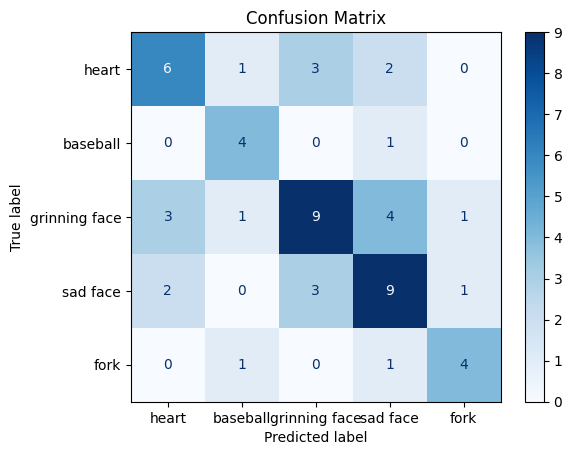

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['heart', 'baseball', 'grinning face', 'sad face', 'fork'])
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()